# 1. Import needed libraries

In [ ]:
import os
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from glob import glob

#--------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

#--------------------------------------------
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam,Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

#--------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# 2. Preprocessing

## 2.1 Load data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!unzip /content/drive/MyDrive/Brain_Tumor_dataset/archive.zip -d /content/

In [ ]:
import zipfile
import os

# Path to your ZIP file in Google Drive
zip_path = '/content/drive/MyDrive/Brain_Tumer_dataset/archive.zip'

# Directory to extract the contents
extract_dir = '/content/drive/MyDrive/Brain_Tumor_dataset'

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)


In [ ]:
# List extracted files and directories
extract_dir = '/content/drive/MyDrive/Brain_Tumor_dataset'
os.listdir(extract_dir)


['Testing', 'Training']

In [ ]:
training_folder = os.path.join(extract_dir, 'Training')
testing_folder = os.path.join(extract_dir, 'Testing')

# List files in the training folder
os.listdir(training_folder)

# List files in the testing folder
os.listdir(testing_folder)

['glioma', 'meningioma', 'notumor', 'pituitary']

In [ ]:
base_dir = '/content/drive/MyDrive/Brain_Tumor_dataset'
train_dir = os.path.join(base_dir, 'Training')
test_dir = os.path.join(base_dir, 'Testing')

# Directory with our training pictures
train_glioma_dir     = os.path.join(train_dir, 'glioma')
train_meningioma_dir = os.path.join(train_dir, 'meningioma')
train_notumor_dir    = os.path.join(train_dir, 'notumor')
train_pituitary_dir  = os.path.join(train_dir, 'pituitary')


# Directory with our test pictures
test_glioma_dir     = os.path.join(test_dir, 'glioma')
test_meningioma_dir = os.path.join(test_dir, 'meningioma')
test_notumor_dir    = os.path.join(test_dir, 'notumor')
test_pituitary_dir  = os.path.join(test_dir, 'pituitary')


## **Create Dataframes**

In [ ]:
# Function to create a DataFrame from a directory
def create_dataframe(directory, class_name):
    file_paths = []
    labels = []

    for filename in os.listdir(directory):
        # Full path to image file
        file_path = os.path.join(directory, filename)
        file_paths.append(file_path)
        labels.append(class_name)

    return pd.DataFrame({'file_path': file_paths, 'label': labels})

In [ ]:
# Create DataFrame for training data
tr_df = pd.concat([
    create_dataframe(train_glioma_dir, 'glioma'),
    create_dataframe(train_meningioma_dir, 'meningioma'),
    create_dataframe(train_notumor_dir, 'notumor'),
    create_dataframe(train_pituitary_dir, 'pituitary')
])

# Create DataFrame for testing data
ts_df = pd.concat([
    create_dataframe(test_glioma_dir, 'glioma'),
    create_dataframe(test_meningioma_dir, 'meningioma'),
    create_dataframe(test_notumor_dir, 'notumor'),
    create_dataframe(test_pituitary_dir, 'pituitary')
])

# Reset index of DataFrames
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

# Display the first few rows of the training DataFrame
print(train_df.head())

# Display the first few rows of the testing DataFrame
print(test_df.head())

NameError: name 'train_df' is not defined

In [ ]:
tr_df

file_path      label
0     /content/drive/MyDrive/Brain_Tumor_dataset/Tra...     glioma
1     /content/drive/MyDrive/Brain_Tumor_dataset/Tra...     glioma
2     /content/drive/MyDrive/Brain_Tumor_dataset/Tra...     glioma
3     /content/drive/MyDrive/Brain_Tumor_dataset/Tra...     glioma
4     /content/drive/MyDrive/Brain_Tumor_dataset/Tra...     glioma
...                                                 ...        ...
1452  /content/drive/MyDrive/Brain_Tumor_dataset/Tra...  pituitary
1453  /content/drive/MyDrive/Brain_Tumor_dataset/Tra...  pituitary
1454  /content/drive/MyDrive/Brain_Tumor_dataset/Tra...  pituitary
1455  /content/drive/MyDrive/Brain_Tumor_dataset/Tra...  pituitary
1456  /content/drive/MyDrive/Brain_Tumor_dataset/Tra...  pituitary

[5712 rows x 2 columns]

In [ ]:
ts_df

file_path      label
0    /content/drive/MyDrive/Brain_Tumor_dataset/Tes...     glioma
1    /content/drive/MyDrive/Brain_Tumor_dataset/Tes...     glioma
2    /content/drive/MyDrive/Brain_Tumor_dataset/Tes...     glioma
3    /content/drive/MyDrive/Brain_Tumor_dataset/Tes...     glioma
4    /content/drive/MyDrive/Brain_Tumor_dataset/Tes...     glioma
..                                                 ...        ...
295  /content/drive/MyDrive/Brain_Tumor_dataset/Tes...  pituitary
296  /content/drive/MyDrive/Brain_Tumor_dataset/Tes...  pituitary
297  /content/drive/MyDrive/Brain_Tumor_dataset/Tes...  pituitary
298  /content/drive/MyDrive/Brain_Tumor_dataset/Tes...  pituitary
299  /content/drive/MyDrive/Brain_Tumor_dataset/Tes...  pituitary

[1311 rows x 2 columns]

# **Visualization**

### **Bar Chart**

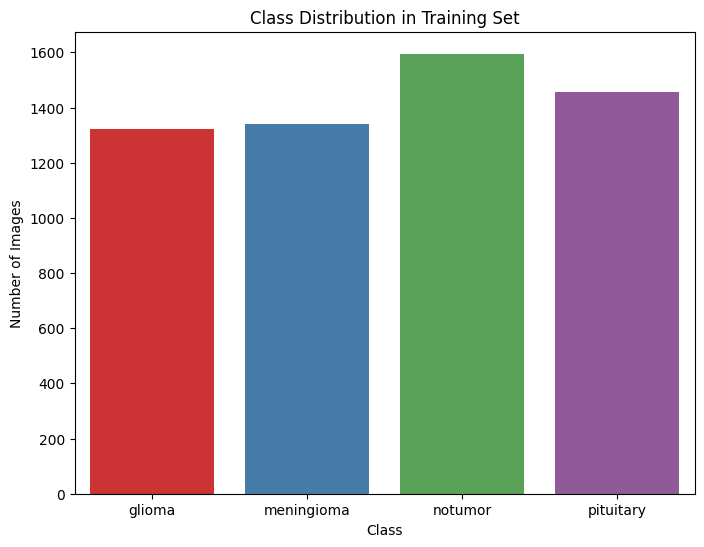

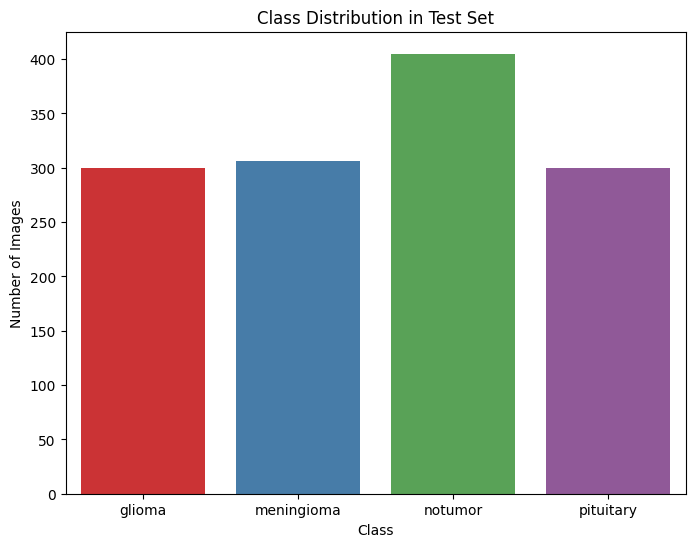

In [ ]:
# Define a custom color palette (optional: you can change these colors)
custom_palette = sns.color_palette("Set1", len(tr_df['label'].unique()))

# Plot class distribution in the training set with different colors
plt.figure(figsize=(8, 6))
sns.countplot(data=tr_df, x='label', palette=custom_palette)
plt.title('Class Distribution in Training Set')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()

# Plot class distribution in the test set with different colors
plt.figure(figsize=(8, 6))
sns.countplot(data=ts_df, x='label', palette=custom_palette)
plt.title('Class Distribution in Test Set')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()

### **Pie Chart**

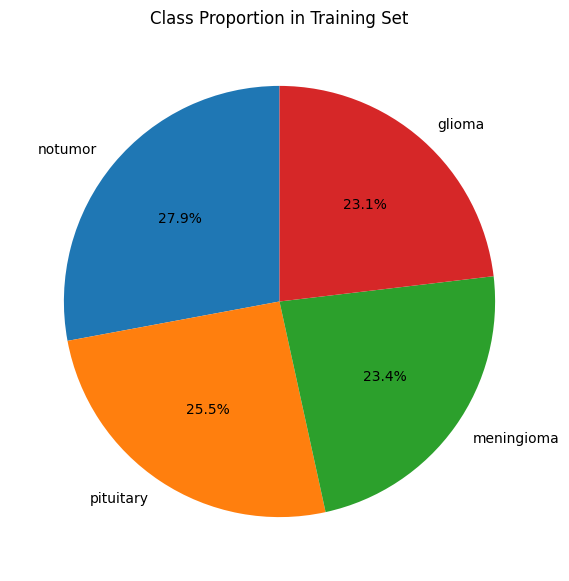

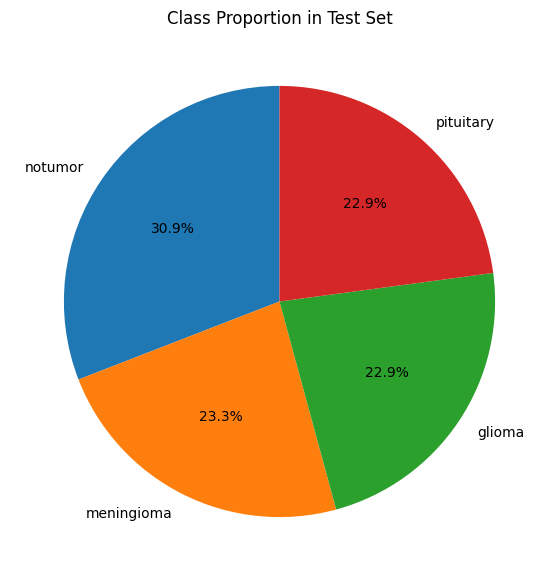

In [ ]:
# Pie chart for training set class distribution
train_class_counts = tr_df['label'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(train_class_counts, labels=train_class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Class Proportion in Training Set')
plt.show()

# Pie chart for test set class distribution
test_class_counts = ts_df['label'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(test_class_counts, labels=test_class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Class Proportion in Test Set')
plt.show()

### **Plot random pictures**

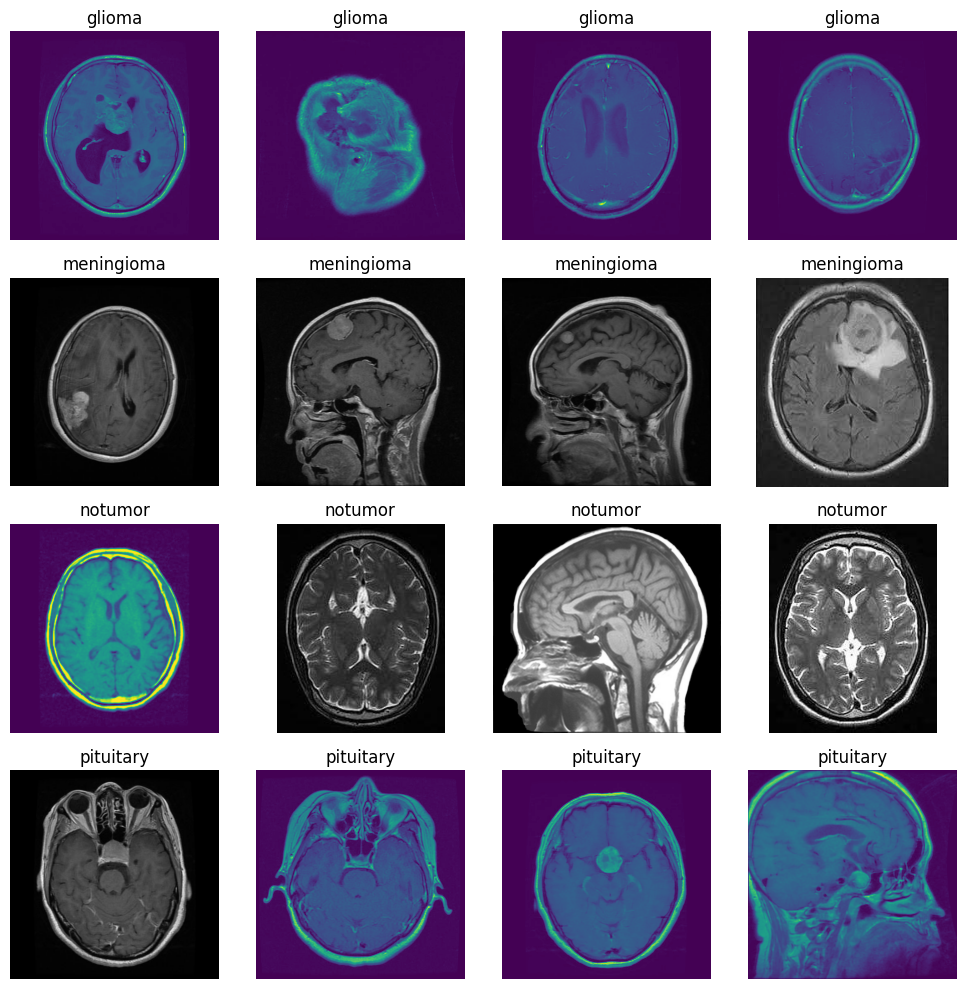

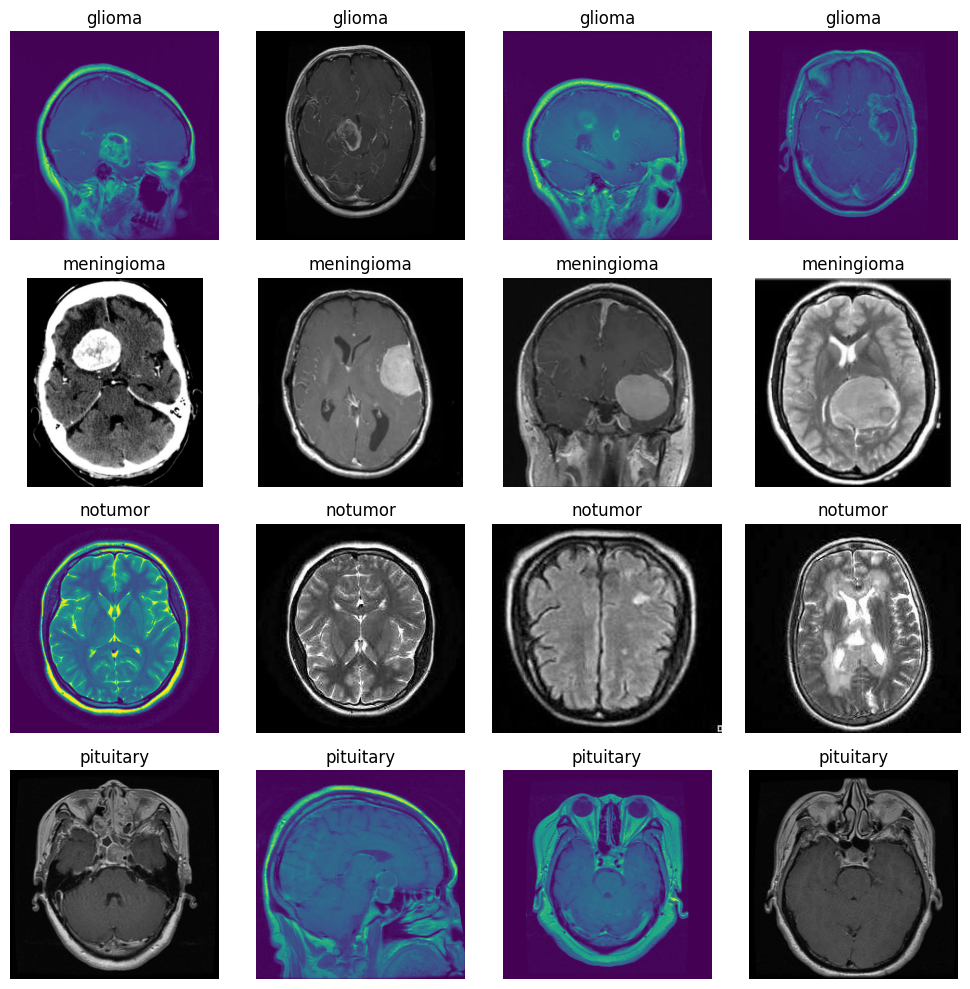

In [ ]:
import numpy as np
import random
from PIL import Image

# Function to display sample images from each class
def show_sample_images(df, num_samples=4):
    plt.figure(figsize=(10, 10))

    for i, class_name in enumerate(df['label'].unique()):
        # Get random samples from the class
        sample_images = df[df['label'] == class_name].sample(num_samples)

        for j, file_path in enumerate(sample_images['file_path']):
            img = Image.open(file_path)
            plt.subplot(len(df['label'].unique()), num_samples, i*num_samples + j + 1)
            plt.imshow(img)
            plt.title(class_name)
            plt.axis('off')

    plt.tight_layout()
    plt.show()

# Display sample images from the training set
show_sample_images(tr_df)

# Display sample images from the test set
show_sample_images(ts_df)

## 2.2 Split data into train, test, valid

In [ ]:
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, random_state=20, stratify=ts_df['Class'])

In [ ]:
valid_df

Class Path       Class
1297  /kaggle/input/brain-tumor-mri-dataset/Testing/...      glioma
723   /kaggle/input/brain-tumor-mri-dataset/Testing/...  meningioma
61    /kaggle/input/brain-tumor-mri-dataset/Testing/...   pituitary
778   /kaggle/input/brain-tumor-mri-dataset/Testing/...  meningioma
1120  /kaggle/input/brain-tumor-mri-dataset/Testing/...      glioma
...                                                 ...         ...
1070  /kaggle/input/brain-tumor-mri-dataset/Testing/...      glioma
554   /kaggle/input/brain-tumor-mri-dataset/Testing/...     notumor
1284  /kaggle/input/brain-tumor-mri-dataset/Testing/...      glioma
899   /kaggle/input/brain-tumor-mri-dataset/Testing/...  meningioma
626   /kaggle/input/brain-tumor-mri-dataset/Testing/...     notumor

[655 rows x 2 columns]

## 2.3 Data preprocessing

In [ ]:
batch_size = 32
img_size = (299, 299)

_gen = ImageDataGenerator(rescale=1/255,
                          brightness_range=(0.8, 1.2),
                          rotation_range=40,
                          width_shift_range=0.2,
                          height_shift_range=0.2,
                          shear_range=0.2,
                          zoom_range=0.2,
                          horizontal_flip=True,
                          fill_mode='nearest')

ts_gen = ImageDataGenerator(rescale=1/255)


tr_gen = _gen.flow_from_dataframe(tr_df, x_col='Class Path',
                                  y_col='Class', batch_size=batch_size,
                                  target_size=img_size)

valid_gen = _gen.flow_from_dataframe(valid_df, x_col='Class Path',
                                     y_col='Class', batch_size=batch_size,
                                     target_size=img_size)

ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col='Class Path',
                                  y_col='Class', batch_size=16,
                                  target_size=img_size, shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


## 2.4 Getting samples from data

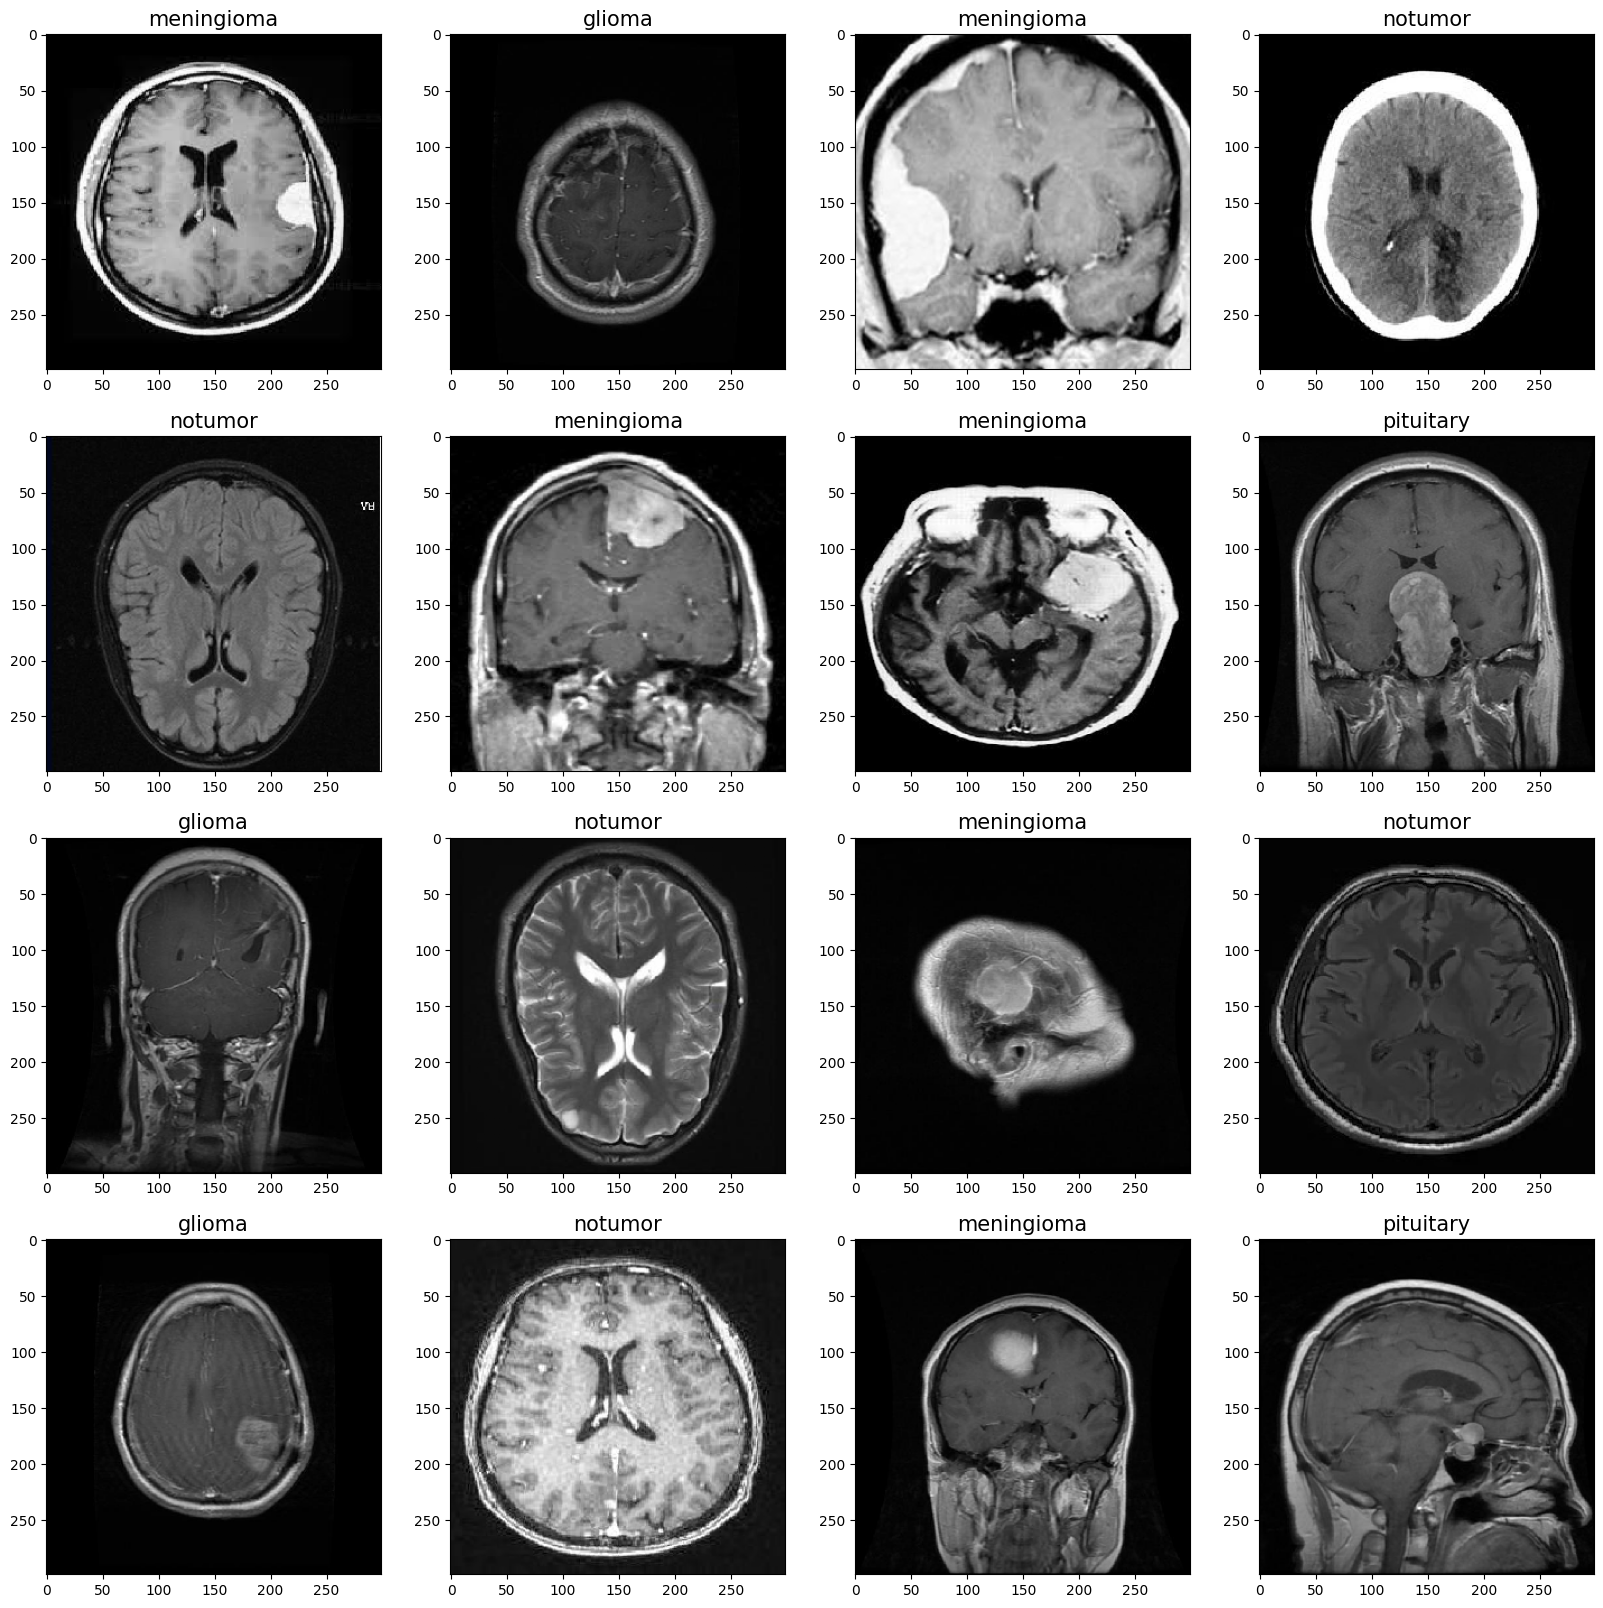

In [ ]:
class_dict = tr_gen.class_indices
classes = list(class_dict.keys())
images, labels = next(ts_gen)

plt.figure(figsize=(20, 20))

for i, (image, label) in enumerate(zip(images, labels)):
    plt.subplot(4,4, i + 1)
    plt.imshow(image)
    class_name = classes[np.argmax(label)]
    plt.title(class_name, color='k', fontsize=15)

plt.show()

# 3. Building Deep Learning Model

In [ ]:
img_shape=(299,299,3)
base_model = tf.keras.applications.Xception(include_top= False, weights= "imagenet",
                            input_shape= img_shape, pooling= 'max')

# for layer in base_model.layers:
#     layer.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate= 0.3),
    Dense(128, activation= 'relu'),
    Dropout(rate= 0.25),
    Dense(4, activation= 'softmax')
])

model.compile(Adamax(learning_rate= 0.001),
              loss= 'categorical_crossentropy',
              metrics= ['accuracy',
                        Precision(),
                        Recall()])

model.summary()

83683744/83683744 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                         

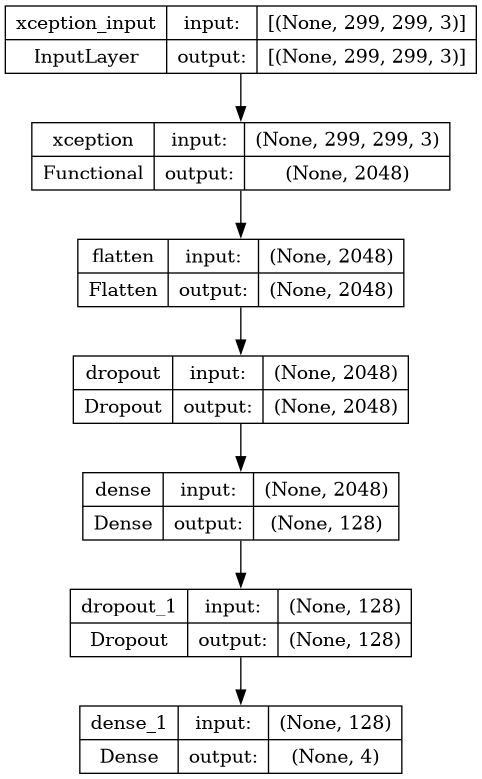

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

# 4. Training

In [ ]:
hist = model.fit(tr_gen,
                 epochs=10,
                 validation_data=valid_gen,
                 shuffle= False)

Epoch 1/10
179/179 [==============================] - 211s 1s/step - loss: 0.6610 - accuracy: 0.7276 - precision: 0.8873 - recall: 0.6091 - val_loss: 0.3716 - val_accuracy: 0.8687 - val_precision: 0.9003 - val_recall: 0.8412
Epoch 2/10
179/179 [==============================] - 151s 843ms/step - loss: 0.1484 - accuracy: 0.9512 - precision: 0.9563 - recall: 0.9461 - val_loss: 0.2709 - val_accuracy: 0.8931 - val_precision: 0.9000 - val_recall: 0.8794
Epoch 3/10
179/179 [==============================] - 149s 833ms/step - loss: 0.0981 - accuracy: 0.9697 - precision: 0.9732 - recall: 0.9666 - val_loss: 0.2175 - val_accuracy: 0.9252 - val_precision: 0.9321 - val_recall: 0.9221
Epoch 4/10
179/179 [==============================] - 151s 842ms/step - loss: 0.0634 - accuracy: 0.9772 - precision: 0.9798 - recall: 0.9758 - val_loss: 0.0879 - val_accuracy: 0.9740 - val_precision: 0.9754 - val_recall: 0.9695
Epoch 5/10
179/179 [==============================] - 153s 853ms/step - loss: 0.0528 - accu

In [ ]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])

In [ ]:
# Assuming your model is named 'model'
model.save('full_model.h5')

## 4.1 Visualize model performance

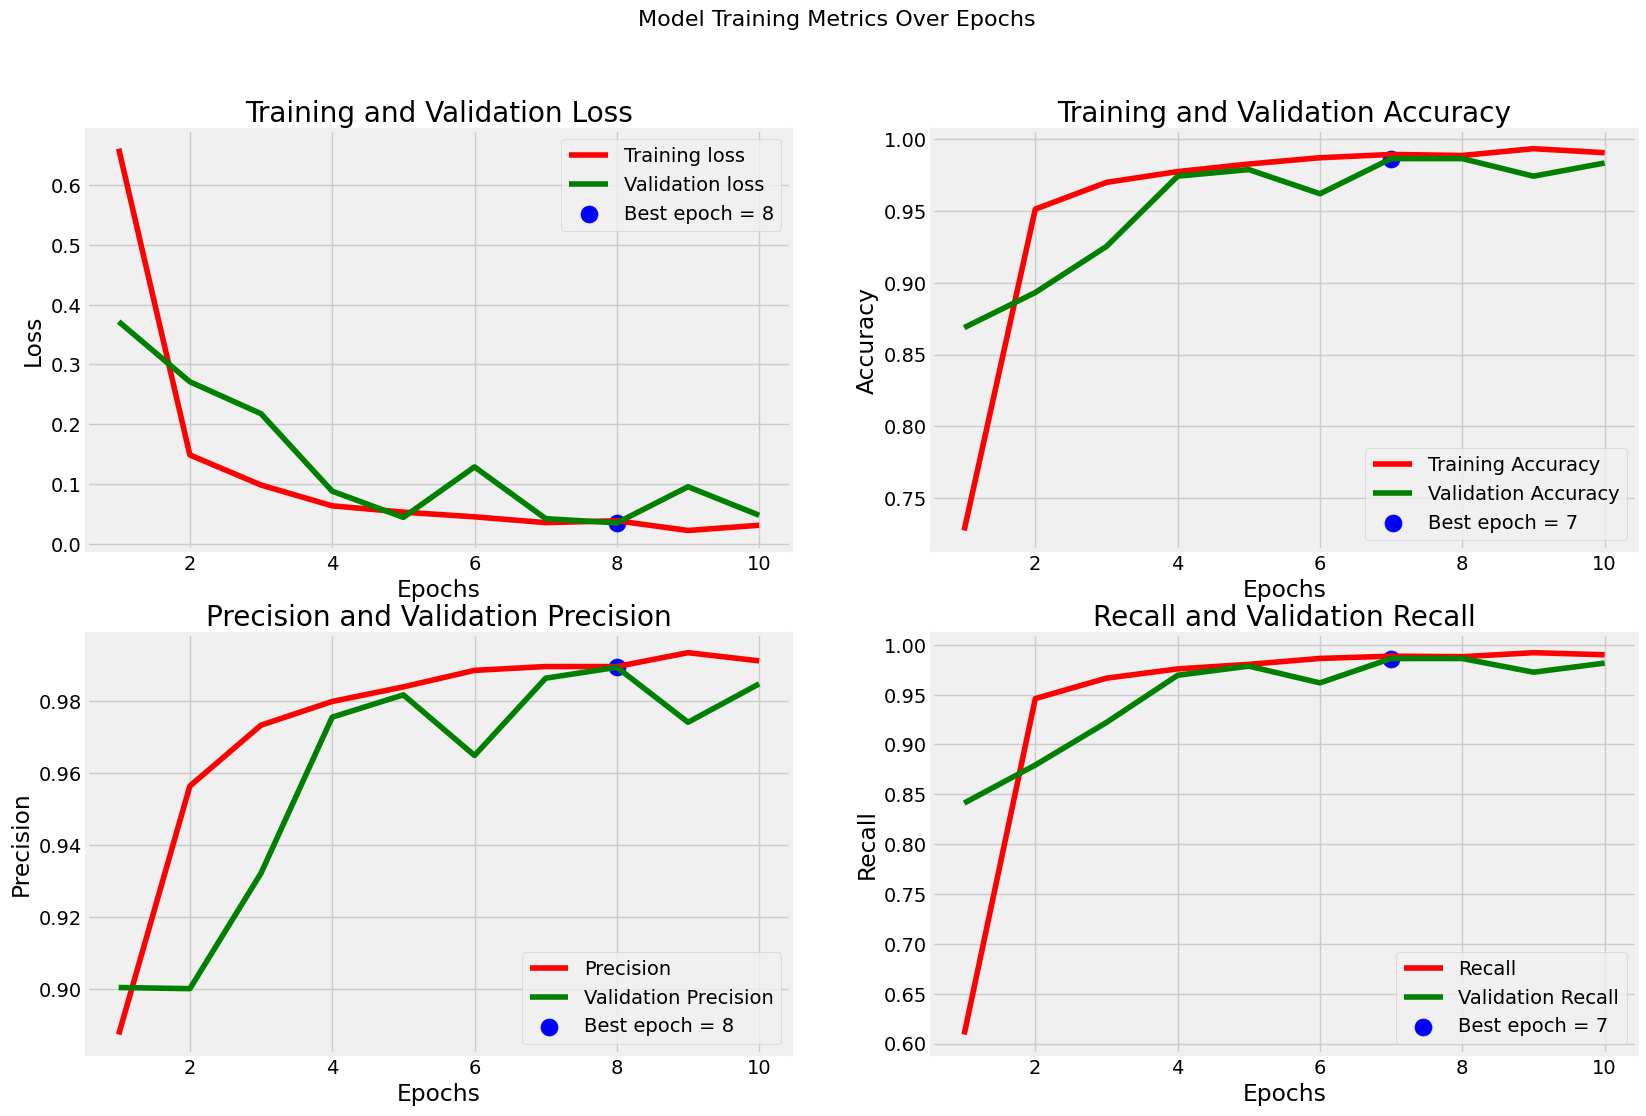

In [ ]:
tr_acc = hist.history['accuracy']
tr_loss = hist.history['loss']
tr_per = hist.history['precision']
tr_recall = hist.history['recall']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']
val_per = hist.history['val_precision']
val_recall = hist.history['val_recall']

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
index_precision = np.argmax(val_per)
per_highest = val_per[index_precision]
index_recall = np.argmax(val_recall)
recall_highest = val_recall[index_recall]

Epochs = [i + 1 for i in range(len(tr_acc))]
loss_label = f'Best epoch = {str(index_loss + 1)}'
acc_label = f'Best epoch = {str(index_acc + 1)}'
per_label = f'Best epoch = {str(index_precision + 1)}'
recall_label = f'Best epoch = {str(index_recall + 1)}'


plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')


plt.subplot(2, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label='Training loss')
plt.plot(Epochs, val_loss, 'g', label='Validation loss')
plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label='Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(Epochs, tr_per, 'r', label='Precision')
plt.plot(Epochs, val_per, 'g', label='Validation Precision')
plt.scatter(index_precision + 1, per_highest, s=150, c='blue', label=per_label)
plt.title('Precision and Validation Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(Epochs, tr_recall, 'r', label='Recall')
plt.plot(Epochs, val_recall, 'g', label='Validation Recall')
plt.scatter(index_recall + 1, recall_highest, s=150, c='blue', label=recall_label)
plt.title('Recall and Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

In [ ]:

# Convert the history object to a DataFrame
hist_df = pd.DataFrame(hist.history)

# Save the DataFrame to a CSV file
hist_df.to_csv('training_history.csv', index=False)

In [ ]:
hist_df = pd.read_csv('training_history.csv')
hist_df.head()

loss  accuracy  precision    recall  val_loss  val_accuracy  \
0  0.660995  0.727591   0.887274  0.609069  0.371620      0.868702   
1  0.148421  0.951155   0.956291  0.946078  0.270914      0.893130   
2  0.098125  0.969713   0.973206  0.966562  0.217490      0.925191   
3  0.063355  0.977241   0.979786  0.975840  0.087850      0.974046   
4  0.052756  0.982493   0.983837  0.980392  0.044016      0.978626   

   val_precision  val_recall  
0       0.900327    0.841221  
1       0.900000    0.879389  
2       0.932099    0.922137  
3       0.975422    0.969466  
4       0.981623    0.978626

# 5. Testing and Evaluation

## 5.1 Evaluate

In [ ]:
train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)

print(f"Train Loss: {train_score[0]:.4f}")
print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print('-' * 20)
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"Validation Accuracy: {valid_score[1]*100:.2f}%")
print('-' * 20)
print(f"Test Loss: {test_score[0]:.4f}")
print(f"Test Accuracy: {test_score[1]*100:.2f}%")


41/41 [==============================] - 5s 123ms/step - loss: 0.0628 - accuracy: 0.9787 - precision: 0.9802 - recall: 0.9787
Train Loss: 0.0352
Train Accuracy: 98.91%
--------------------
Validation Loss: 0.0535
Validation Accuracy: 97.86%
--------------------
Test Loss: 0.0628
Test Accuracy: 97.87%


In [ ]:
preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

41/41 [==============================] - 4s 70ms/step


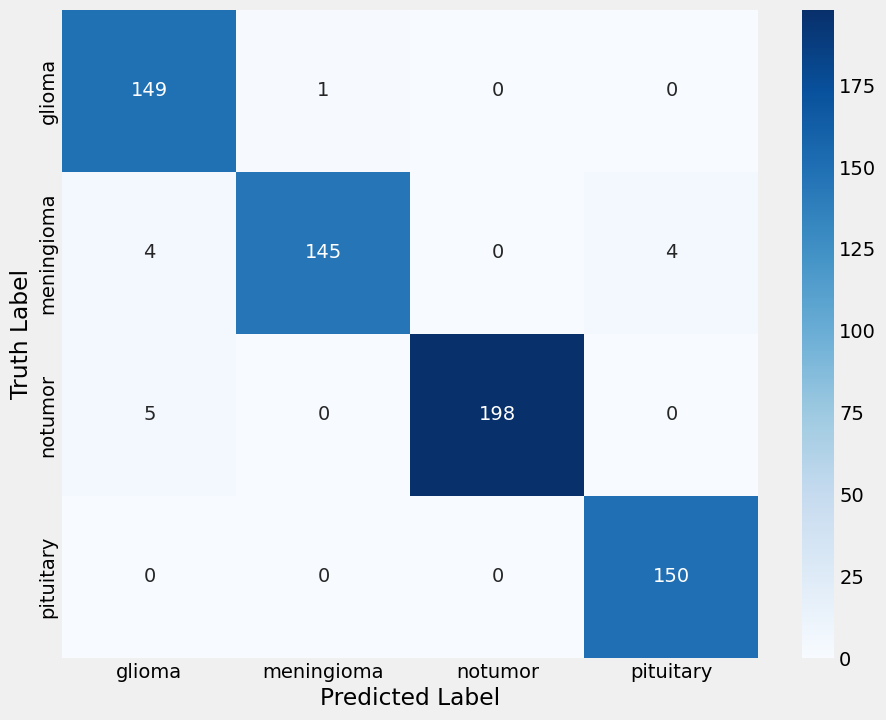

In [ ]:
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('Truth Label')
plt.show()

In [ ]:
clr = classification_report(ts_gen.classes, y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       150
           1       0.99      0.95      0.97       153
           2       1.00      0.98      0.99       203
           3       0.97      1.00      0.99       150

    accuracy                           0.98       656
   macro avg       0.98      0.98      0.98       656
weighted avg       0.98      0.98      0.98       656



## 5.2 Testing

In [ ]:
def predict(img_path):
    import numpy as np
    import matplotlib.pyplot as plt
    from PIL import Image
    label = list(class_dict.keys())
    plt.figure(figsize=(12, 12))
    img = Image.open(img_path)
    resized_img = img.resize((299, 299))
    img = np.asarray(resized_img)
    img = np.expand_dims(img, axis=0)
    img = img / 255
    predictions = model.predict(img)
    probs = list(predictions[0])
    labels = label
    plt.subplot(2, 1, 1)
    plt.imshow(resized_img)
    plt.subplot(2, 1, 2)
    bars = plt.barh(labels, probs)
    plt.xlabel('Probability', fontsize=15)
    ax = plt.gca()
    ax.bar_label(bars, fmt = '%.2f')
    plt.show()

1/1 [==============================] - 1s 1s/step


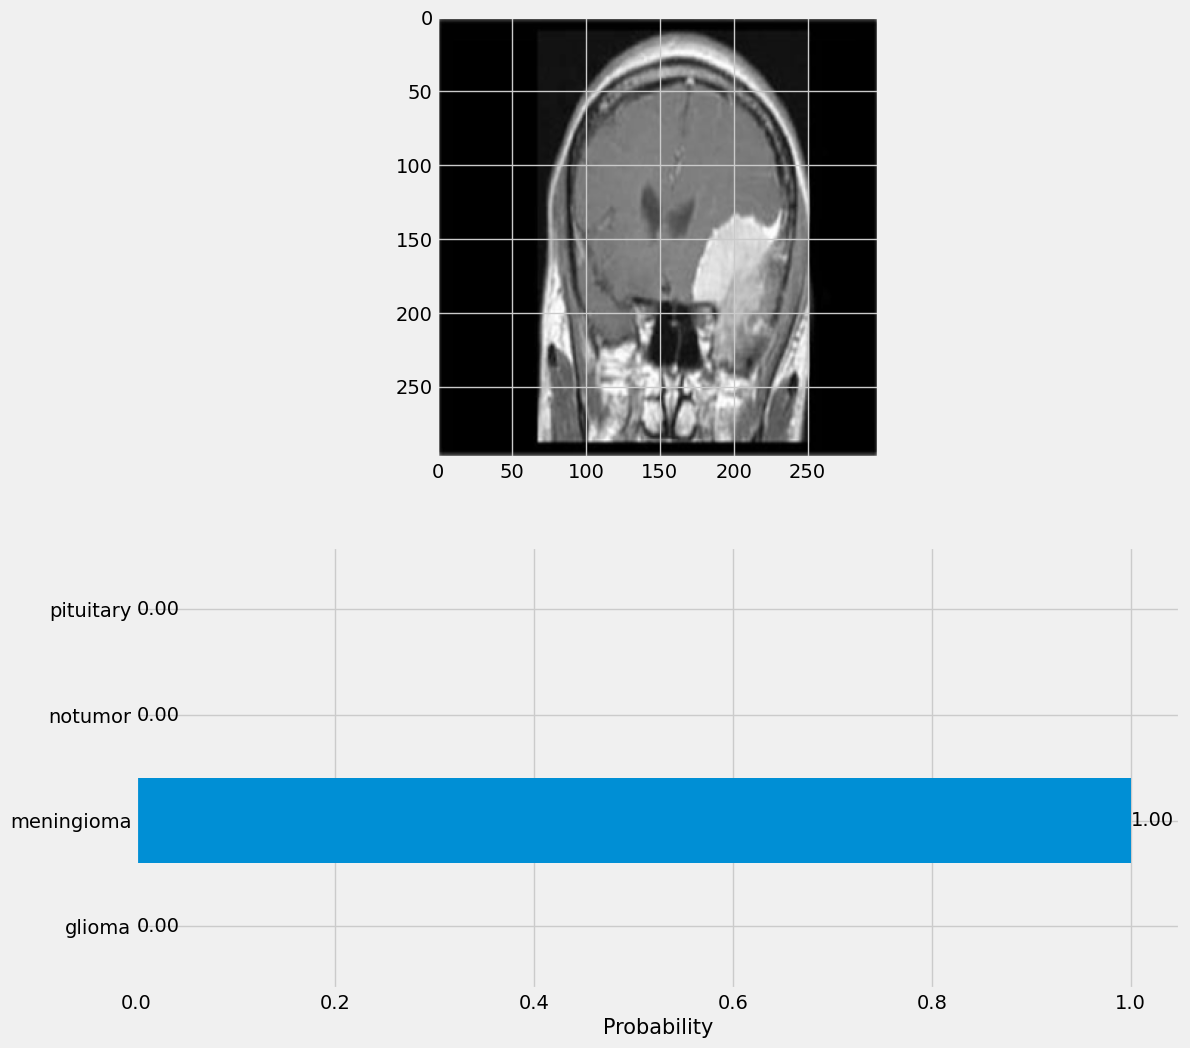

In [ ]:
predict('/content/drive/MyDrive/Brain_Tumor_dataset/Testing/meningioma/Te-meTr_0000.jpg')

1/1 [==============================] - 0s 22ms/step


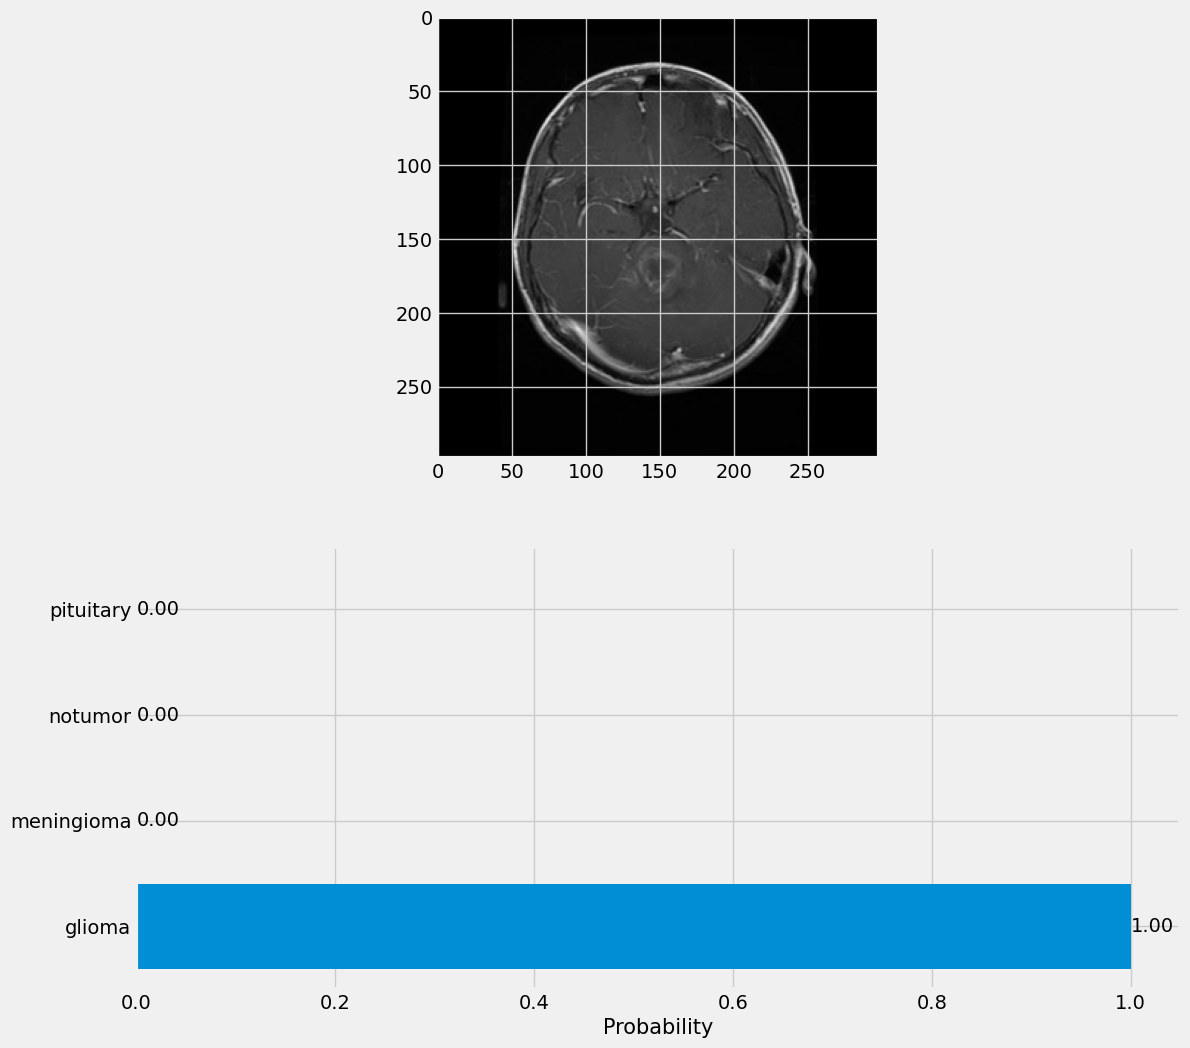

In [ ]:
predict('/content/drive/MyDrive/Brain_Tumor_dataset/Testing/glioma/Te-gl_0016.jpg')

1/1 [==============================] - 0s 22ms/step


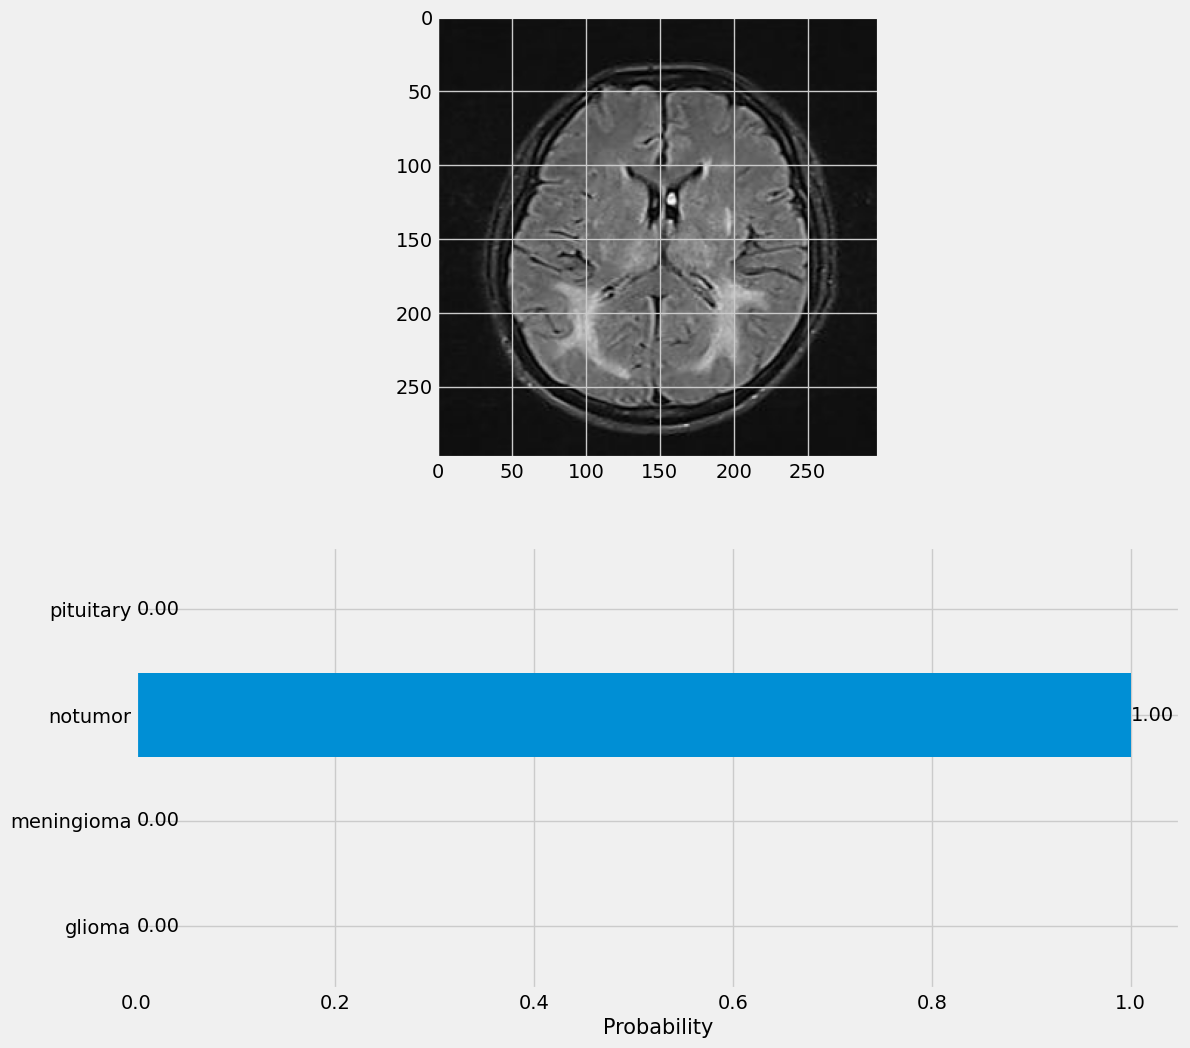

In [ ]:
predict('/content/drive/MyDrive/Brain_Tumor_dataset/Testing/notumor/Te-no_0013.jpg')

1/1 [==============================] - 0s 21ms/step


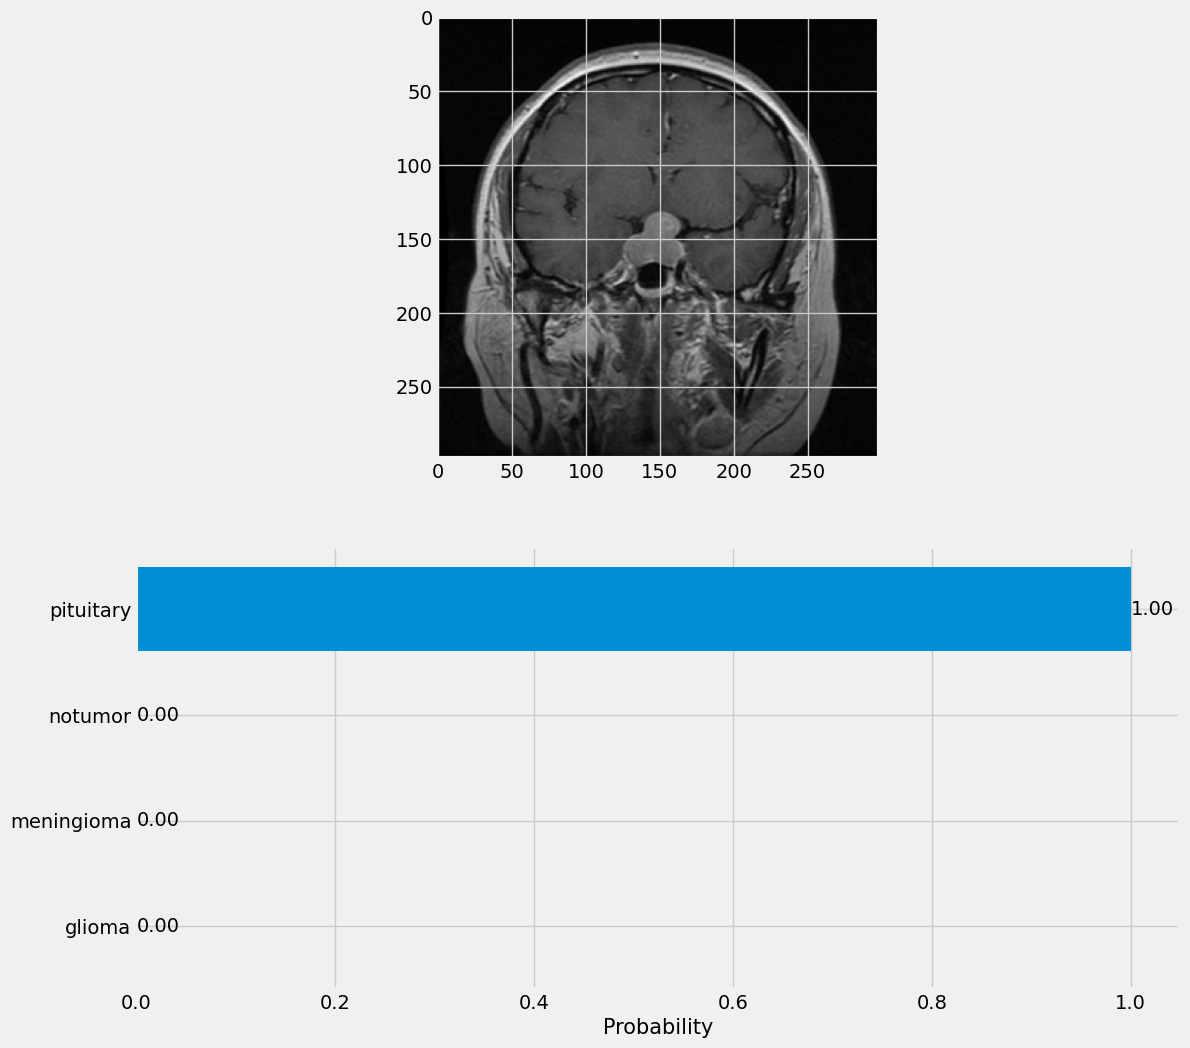

In [ ]:
predict('/content/drive/MyDrive/Brain_Tumor_dataset/Testing/pituitary/Te-pi_0077.jpg')

# **THE END**